### Друзья у людей с разными именами.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('vk_friends.csv', sep=';', header=None)

In [17]:
### data cleaning / preprocessing
df.columns = ['uid', 'name', 'frndsnum', 'friends']
df['friends'] = df['friends'].str.split('|')
df = df[['name', 'friends']].explode('friends')
df['count'] = 1
df = df.groupby(['name', 'friends'], as_index=False).sum()
df = df[df['friends'] != 'DELETED']
df = df.sort_values(by='count', ascending=False)

In [18]:
print(df.reset_index(drop=True).head(20).rename(columns={'name': 'Имя человека', 'friends': 'Имя друга', 'count': 'Количество'}))

   Имя человека  Имя друга  Количество
0     Alexander  Alexander         713
1         Elena      Elena         690
2        Sergey  Alexander         674
3     Alexander     Sergey         557
4        Sergey     Sergey         553
5       Natalya      Elena         550
6         Elena    Tatyana         508
7         Elena       Olga         508
8         Elena    Natalya         507
9       Natalya    Natalya         492
10     Svetlana      Elena         491
11      Tatyana      Elena         487
12       Alexey  Alexander         486
13      Natalya    Tatyana         469
14         Olga      Elena         458
15       Andrey  Alexander         447
16        Irina      Elena         446
17      Natalya       Olga         442
18       Sergey     Andrey         442
19         Olga    Tatyana         439


In [19]:
### variables
topfriendlover = 20
records = df.shape[0]

In [20]:
### list of top friend-lovers
bestfr = df[['name', 'count']].groupby('name', as_index=False).sum().sort_values(by='count', ascending=False)[:topfriendlover]['name'].to_list()
df = df[df['name'].isin(bestfr)]

In [21]:
df = df.pivot('name', 'friends', 'count')
df = df.reindex(df.sum().sort_values(ascending=False).index, axis=1).iloc[:, :50]
df.fillna(0, inplace=True)
print(df.head())

friends    Elena  Alexander  Tatyana   Olga  Natalya  Sergey  Anastasia  \
name                                                                      
Alexander  305.0      713.0    265.0  282.0    249.0   557.0      314.0   
Alexey     208.0      486.0    149.0  181.0    163.0   363.0      176.0   
Anastasia  270.0      250.0    209.0  167.0    198.0   175.0      380.0   
Andrey     187.0      447.0    187.0  145.0    126.0   313.0      202.0   
Anna       228.0      165.0    225.0  191.0    200.0   128.0      244.0   

friends    Irina  Svetlana  Andrey  ...   Dima  Evgenia   Oleg  Anton  Pavel  \
name                                ...                                        
Alexander  280.0     209.0   420.0  ...  122.0     72.0  146.0  146.0  132.0   
Alexey     128.0     123.0   290.0  ...   88.0     46.0   87.0   92.0   97.0   
Anastasia  204.0     170.0   185.0  ...   80.0     88.0   61.0   66.0   54.0   
Andrey     148.0     138.0   356.0  ...  104.0     55.0   97.0   98.0   97

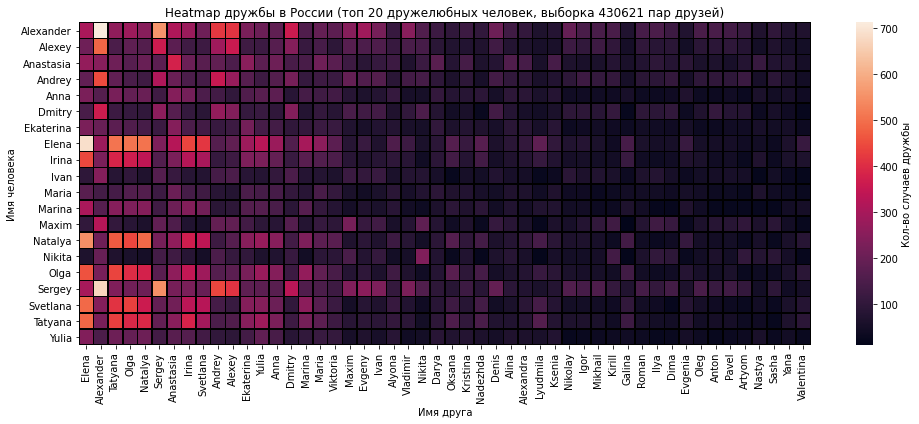

In [22]:
plt.figure(figsize=(14, 6))
sns.heatmap(df, linewidths=0.5, linecolor='black', cbar_kws={'label': 'Кол-во случаев дружбы'})
plt.xlabel('Имя друга')
plt.ylabel('Имя человека')
plt.title('Heatmap дружбы в России (топ 20 дружелюбных человек, выборка %d пар друзей)' % records)
plt.tight_layout()
plt.savefig('friendship.png')